In [ ]:
!pip install kaggle

In [ ]:
kaggle = '/content/kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.05GB/s]


In [ ]:
from zipfile import ZipFile
import os
file_name='handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok= True)

with ZipFile(file_name,'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [ ]:
data_0=os.listdir('/content/dataset/0')
data_1=os.listdir('/content/dataset/1')
data_2=os.listdir('/content/dataset/2')
data_3=os.listdir('/content/dataset/3')
data_4=os.listdir('/content/dataset/4')
data_5=os.listdir('/content/dataset/5')
data_6=os.listdir('/content/dataset/6')
data_7=os.listdir('/content/dataset/7')
data_8=os.listdir('/content/dataset/8')
data_9=os.listdir('/content/dataset/9')


In [ ]:
len(data_0)

2236

In [ ]:
import os

base_dir = "/content/dataset"

# cek folder kelas yang ada
class_folders = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])
print("Class folders:", class_folders)

# hitung jumlah gambar per kelas
counts = {c: len(os.listdir(os.path.join(base_dir, c))) for c in class_folders}
print("Counts per class:", counts)

# total gambar
total_images = sum(counts.values())
print("Total images:", total_images)

Class folders: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Counts per class: {'0': 2236, '1': 2241, '2': 2233, '3': 2202, '4': 2179, '5': 2126, '6': 2121, '7': 2116, '8': 2085, '9': 2016}
Total images: 21555


Path gambar: /content/dataset/2/Two_full (80).jpg
Tipe data: <class 'numpy.ndarray'>
Shape gambar: (140, 90)
Nilai pixel min-max: 44 - 255


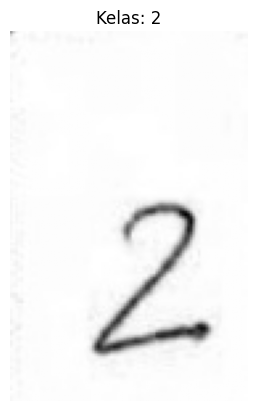

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# ambil satu gambar secara acak dari salah satu kelas
random_class = random.choice(class_folders)
random_file = random.choice(os.listdir(os.path.join(base_dir, random_class)))
img_path = os.path.join(base_dir, random_class, random_file)

# baca gambar grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

print("Path gambar:", img_path)
print("Tipe data:", type(img))
print("Shape gambar:", img.shape)
print("Nilai pixel min-max:", img.min(), "-", img.max())

# tampilkan gambar
plt.imshow(img, cmap='gray')
plt.title(f"Kelas: {random_class}")
plt.axis('off')
plt.show()

Shape setelah resize: (28, 28)
Nilai pixel setelah normalisasi (min-max): 0.39607844 - 1.0


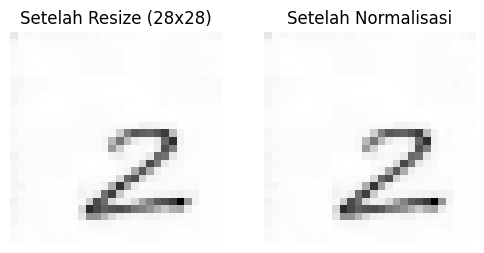

In [ ]:
# resize citra ke 28x28
img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

# normalisasi pixel
img_normalized = img_resized.astype("float32") / 255.0

print("Shape setelah resize:", img_resized.shape)
print("Nilai pixel setelah normalisasi (min-max):",
      img_normalized.min(), "-", img_normalized.max())

# tampilkan perbandingan
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(img_resized, cmap='gray')
plt.title("Setelah Resize (28x28)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_normalized, cmap='gray')
plt.title("Setelah Normalisasi")
plt.axis('off')

plt.show()

In [ ]:
X = []
y = []

img_size = 28

for label in class_folders:
    class_path = os.path.join(base_dir, label)
    files = os.listdir(class_path)

    for file in files:
        img_path = os.path.join(class_path, file)

        # baca grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        # resize
        img = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)

        # normalisasi
        img = img.astype("float32") / 255.0

        # flatten 28x28 -> 784
        img_flat = img.flatten()

        X.append(img_flat)
        y.append(int(label))

X = np.array(X)
y = np.array(y)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (21555, 784)
Shape y: (21555,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape: (17244, 784)
X_test shape : (4311, 784)
y_train shape: (17244,)
y_test shape : (4311,)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    batch_size=128,
    max_iter=20,
    random_state=42,
    verbose=True
)

print(mlp)

MLPClassifier(batch_size=128, hidden_layer_sizes=(128, 64), max_iter=20,
              random_state=42, verbose=True)


In [ ]:
# training model
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.28085077
Iteration 2, loss = 2.14308088
Iteration 3, loss = 1.97972298
Iteration 4, loss = 1.87556607
Iteration 5, loss = 1.79848079
Iteration 6, loss = 1.74857049
Iteration 7, loss = 1.67053031
Iteration 8, loss = 1.64898768
Iteration 9, loss = 1.59300166
Iteration 10, loss = 1.56629183
Iteration 11, loss = 1.52998436
Iteration 12, loss = 1.50794432
Iteration 13, loss = 1.47263106
Iteration 14, loss = 1.45461503
Iteration 15, loss = 1.45833638
Iteration 16, loss = 1.40334490
Iteration 17, loss = 1.39555366
Iteration 18, loss = 1.37102332
Iteration 19, loss = 1.33951113
Iteration 20, loss = 1.33620930


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=128, hidden_layer_sizes=(128, 64), max_iter=20,
              random_state=42, verbose=True)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# prediksi data uji
y_pred = mlp.predict(X_test)

# akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5669218278821619
Confusion Matrix:
 [[352   8  11   3  45   7  16   4   0   1]
 [ 16 337   4   6  17   9  11  34   0  14]
 [ 24  30 262  24  22  12  34  36   2   1]
 [ 13  22  58 253  20  23   5  36   3   8]
 [  4  27   0   5 302   6  38  30   2  22]
 [ 22  33  28  38  54 173  37  21   7  12]
 [ 13  19  15   8  81   8 262  13   5   0]
 [  8  27  17  30  27   9   9 280   5  11]
 [ 14  41  24  29  51  62  47  47  94   8]
 [  8  20  32  64  67  18   1  58   6 129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       447
           1       0.60      0.75      0.67       448
           2       0.58      0.59      0.58       447
           3       0.55      0.57      0.56       441
           4       0.44      0.69      0.54       436
           5       0.53      0.41      0.46       425
           6       0.57      0.62      0.59       424
           7       0.50      0.66      0.57       423
         

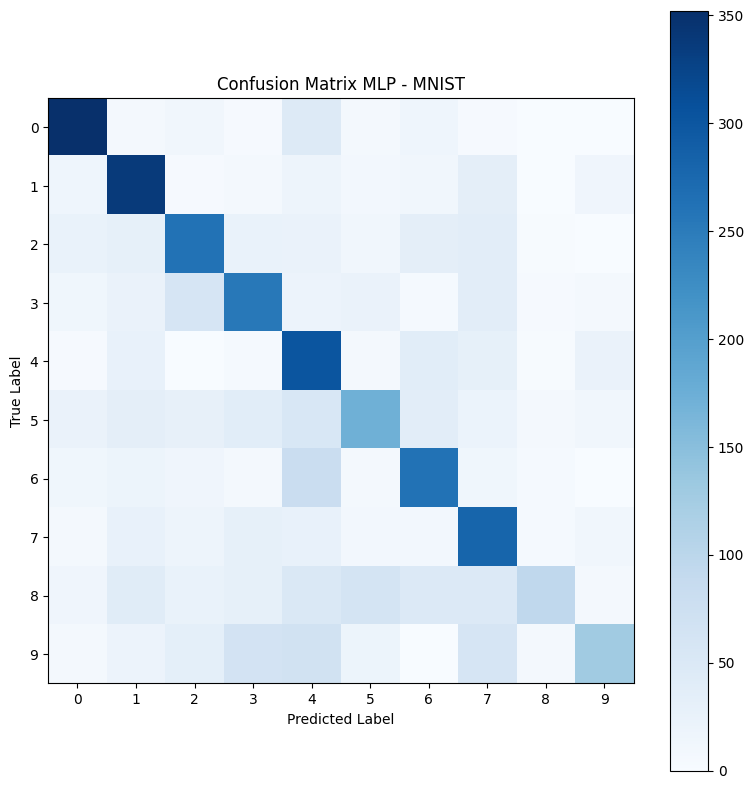

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix MLP - MNIST")
plt.colorbar()

tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()